In [3]:
# импорты 
import io
from googleapiclient.http import MediaIoBaseDownload
import googleapiclient.discovery
from apiclient import discovery
from httplib2 import Http
import oauth2client
from oauth2client import file, client, tools

import pandas as pd

/Users/nsh/.pyenv/versions/3.7.2/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# проводим аутентификацию через гугловую апишку

obj = lambda: None
lmao = {"auth_host_name":'localhost', 'noauth_local_webserver':'store_true', 'auth_host_port':[8080, 8090], 'logging_level':'ERROR'}
for k, v in lmao.items():
    setattr(obj, k, v)
    
# authorization boilerplate code
SCOPES = 'https://www.googleapis.com/auth/drive.readonly'
store = file.Storage('token.json')
creds = store.get()
# The following will give you a link if token.json does not exist, the link allows the user to give this app permission
if not creds or creds.invalid:
    flow = client.flow_from_clientsecrets('credentials.json', SCOPES)
    creds = tools.run_flow(flow, store, obj)

In [10]:
# считываем необходимый файл. Удобно забирать прямо с диска - все изменения на диске тянем сразу 
#  (перезаписываем файл на локальной машине)

DRIVE = googleapiclient.discovery.build(serviceName='drive'
                                        , version='v3'
                                        , http=creds.authorize(Http()))
# if you get the shareable link, the link contains this id, replace the file_id below

file_id = '1Als69NnelNAkESLfJNf7DTAiuIIcDmbH'
request = DRIVE.files().get_media(fileId=file_id)
# replace the filename and extension in the first field below
fh = io.FileIO('data/fraud_detection.xlsb', mode='w')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100)) 

Download 100%.


In [14]:
!pip3 install pandas --upgrade
!pip3 install pyxlsb

Requirement already up-to-date: pandas in /Users/nsh/.pyenv/versions/3.7.2/lib/python3.7/site-packages (1.1.3)


In [4]:
# путь к исходному файлу с результатами теста
path_to_file = './data/fraud_detection.xlsb'

In [5]:
# чтение файла в датафрейм
split = pd.read_excel(path_to_file
                      , engine='pyxlsb')

split.sample(3)

,session_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,fraud
11051,63356955,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
90213,37918356,0,-3,0,0,0,0,23,1,0,...,1,1,1,1,1,1,1,1,1,0
55930,49340441,0,7,0,0,0,0,0,1,0,...,2,1,2,2,3,3,1,1,1,0


In [6]:
split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94579 entries, 0 to 94578
Columns: 194 entries, session_id to fraud
dtypes: float64(5), int64(189)
memory usage: 140.0 MB


In [7]:
split.describe()

,session_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,fraud
count,9.457900e+04,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,...,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000,94579.000000
mean,5.163537e+07,0.071771,0.853805,0.027755,0.159930,-5.323677,0.009632,0.712642,0.749236,0.159475,...,0.929139,0.925427,0.844194,0.872255,1.233107,1.453663,0.838431,1.357035,1.520538,0.042737
std,9.000736e+06,0.628175,5.797516,0.409324,0.366543,16.767269,0.097670,3.883613,0.433455,0.366121,...,0.489513,0.471962,0.451688,0.683131,1.874275,2.608032,0.426055,2.133910,2.918705,0.202264
min,3.723760e+07,-10.000000,-89.000000,-13.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.343542e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,5.203958e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,5.930783e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.713718e+07,23.000000,61.000000,15.000000,1.000000,0.000000,1.000000,31.000000,1.000000,1.000000,...,13.000000,7.000000,9.000000,19.000000,47.000000,53.000000,7.000000,47.000000,64.000000,1.000000


In [14]:
import seaborn as sns

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)


RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

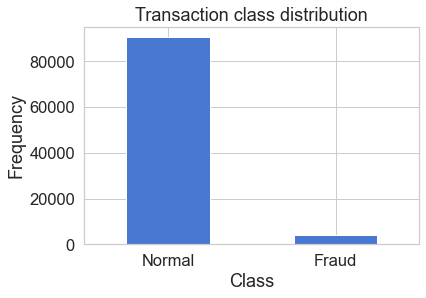

In [15]:
import matplotlib.pyplot as plt

count_classes = pd.value_counts(split['fraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# Univariate feature selection

Univariate feature selection removes features by calculating a statistical score for individual features only select features with high-ranking scores. Scores for each feature is calculated independently, make this method very efficient and can be performed in parallel. Univariate feature selection is useful when the number of features is very large, compared to the number samples.
In univariate feature selection, scores are typically evaluated between input features and class labels/target variables. For classification problems, continous features can be scored using various statistical test, including Mann-Whitney U tests, t-tests, ANOVA models, area under the ROC curve (AUROC). ANOVA models can accomodate multi-class labels. For discrete features, chi-square test, mutual information or gini index are useful criteria.

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

In [54]:
labels = split['fraud']
split_feature = split.drop(columns = 'fraud')

In [55]:
split_feature.head()

,session_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192
0,67137182,0,-3,0,0,0,1,0,1,0,...,2,4,2,1,1,12,12,1,12,12
1,67136918,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,67135399,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
3,67136514,0,12,0,0,0,0,0,1,0,...,1,1,1,1,1,2,2,1,2,2
4,67136271,0,0,0,1,-6,0,0,1,0,...,1,1,1,1,1,3,3,1,3,3


In [62]:
# 5 best feature
n=5

# Create and fit selector
selector = SelectKBest(f_classif, k=n)
selector.fit(split_feature, labels)
# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
features_df_new = split_feature.iloc[:, cols]

In [63]:
features_df_new.head()

,feature_22,feature_38,feature_158,feature_162,feature_188
0,1,2,3,3,12
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,2
4,0,2,3,3,3


# Model evaluation

In [ ]:
# import classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classification_report = classification_report(y_test_undersample, y_pred)
confusion_matrix = confusion_matrix(y_test_undersample, y_pred)

print("CLASSIFICATION REPORT")
print(classification_report)
print("CONFUSION MATRIX") 
print(confusion_matrix)